# Biblioteca Scikit, algoritmos, particion de BD, evaluaciones
Curso: Aplicaciones del aprendizaje automático usando Python <br>
Actividad 5: Biblioteca Scikit, algoritmos, particion de BD, evaluaciones<br> <br>


En esta actividad se utiliza la biblioteca libre para machine learning Scikit. Se utiliza la base de datos iris que contiene información de tres tipos de flores distintas. Se hace una partición de la base de datos en datos de entrenamiento, prueba, validación cruzada y se utilizan métricas para probar la eficiancia de los algoritmos.


Parte de este código fue obtenido de Gaël Varoquaux y Jaques Grobler con licencia BSD 3 clause

Objetivos:
1. Trabajar con la biblioteca Scikit
2. Leer y describir la base de datos iris
3. Graficar los elementos de la base de datos
4. Entrenar un modelo de clasificación con regresión logistica
5. Hacer predicciones con el modelo de regresión logística
6. Partición de la base de datos
7. Uso de la máquina de soporte vectorial
8. Usar validación cruzada
9. Cambiar métrica para evaluación



## Importar Scikit y otras bibliotecas

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model   #Importar el modelo de clasificación que se va a utilizar
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris  #Importar la función para cargar la base de datos

## Cargar y entender base de datos
A continuación se carga la base de datos iris la cual es ampliamente utilizada de forma didáctica para el aprendizaje del tema de machine learning.

Esta base de datos cuenta con información de tres distintos tipos de flores las cuales se muestran a continuación. <br>
<img src="./irises.png"> <br>

Las 3 clases de flores son: ['setosa', 'versicolor', 'virginica']. <br>
Incluye 50 ejemplos por clase, con un total de 150 por las 3 clases. <br>
Se contiene la información de 4 características(atributos) de tipo real positivos> [sepal length, sepal width, length, petal width] . <br> 

In [68]:
# Cargar la base de datos iris
iris = load_iris()

print("--------------Etiquetas---------------")
print(list(iris.target))
print("--------------Nombre de las clases--------------")
print(iris.target_names)
print("--------------Nombre de las características--------------")
print(iris.feature_names)
print("--------------Datos--------------")
print(iris.data)
print("--------------Descripción completa de los datos--------------")
print(iris.DESCR)

--------------Etiquetas---------------
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
--------------Nombre de las clases--------------
['setosa' 'versicolor' 'virginica']
--------------Nombre de las características--------------
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
--------------Datos--------------
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4

## Graficación de los datos
A continación se despliegan los datos usando una gráfica tipo *scatter* <br>

Aunque la dimensión de los datos es de 4, la gráfica scatter es de dos dimensiones en el plano, por lo tanto solo se grafica una dimensión contra otra. Se pueden cambiar las dimensiones que se grafican modificando los renglones 2 y 3.

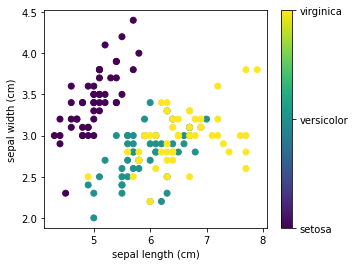

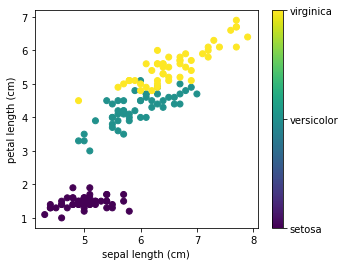

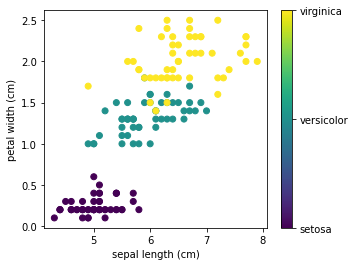

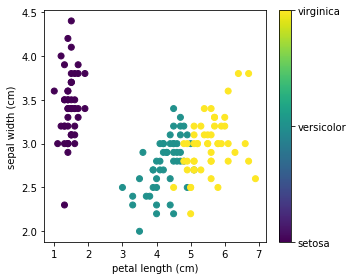

In [69]:
# Los índices de las características que se grafican
x_axis_index = 0  
y_axis_index = 1

# Esta función va a etiquetar la base de datos con los nombres correctos
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

#Graficación
plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_axis_index], iris.data[:, y_axis_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_axis_index])
plt.ylabel(iris.feature_names[y_axis_index])

plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_axis_index], iris.data[:, 2], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_axis_index])
plt.ylabel(iris.feature_names[2])

plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_axis_index], iris.data[:, 3], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_axis_index])
plt.ylabel(iris.feature_names[3])

x = 2
y = 1
plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x], iris.data[:, y], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x])
plt.ylabel(iris.feature_names[y])

plt.tight_layout()
plt.show()

<span style="color:magenta">__Pruébalo__:</span> Modifica el código para desplegar las siguientes gráficas.

<table><tr><td><img src="./images/img1.png"></td><td><img src="./images/img2.png"></td><td><img src="./images/img3.png"></td></tr></table>


## Preparación de los datos
En este ejemplo se utilizaran únicamente las primeras 2 características para hacer la clasificación.

In [70]:
X = iris.data[:, :2]  # Se toman las dos primeras características
Y = iris.target
print("Solo las dos primeras características")
print(X)
print("Las etiquetas")
print(Y)

Solo las dos primeras características
[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3

## Uso de algoritmo de aprendizaje
En esta parte se define que algoritmo de aprendizaje se va a utilizar. En este caso es el algoritmo regresión logistica. <br>

A continuación se le pasan las características y las etiquetas para que realice el ajuste de parámetros para generar un modelo.

In [71]:
# Se define el algoritmo de aprendizaje a utilizar
logreg = LogisticRegression(C=1e5,solver='lbfgs', multi_class='auto')

# Se pasan los datos para que se ajuste el modelo
logreg.fit(X, Y)

LogisticRegression(C=100000.0)

## Predicciones
Se obtienen la predicciones con el modelo entrenado

In [72]:
print("Clasificando todo los elementos de X")
predictions = logreg.predict(X)
print(predictions)
print("---------------------------")


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y, predictions)
print("Matriz de confusión")
print(cm)
print("---------------------------")

print("Clasificando un solo elemento")
singleElement = 60
print("Caracteristicas =",X[singleElement,:])
print("Clase verdadera =",Y[singleElement])
value = X[singleElement,:]
Z = logreg.predict(value.reshape(1,-1))
print("Clase predicha = ", Z)
#poner precision

Clasificando todo los elementos de X
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 2 1 2 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 2 2 2 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 2 2 2 1 1 2 2 2 2 2 2 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
---------------------------
Matriz de confusión
[[50  0  0]
 [ 0 38 12]
 [ 0 13 37]]
---------------------------
Clasificando un solo elemento
Caracteristicas = [5. 2.]
Clase verdadera = 1
Clase predicha =  [1]


## Grafica de un plano con las predicciones del modelo

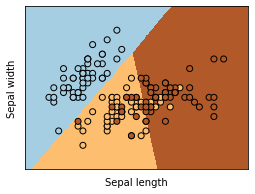

In [73]:
h = .02  # tamaño de paso en la partición del plano
# Graficar la frontera de desicion.
#Se definen los limites del plano
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
#Se hace la predicción en cada punto del plano
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Graficar también los puntos de los datos
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()


In [74]:
#http://www.scipy-lectures.org/packages/scikit-learn/
#http://www.scipy-lectures.org/packages/scikit-learn/auto_examples/plot_iris_scatter.html
#http://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html
#http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

## Ejemplo de partición del conjunto de datos
En el ejemplo anterior se realizaron las predicciones sobre los mismos elementos de la base de datos. (Esto no debe de hacerse en la práctica) <br>
A continuación se harán particiones de la base de datos y se entrenará solo sobre los datos de entrenamiento y se probará con los datos de prueba. <br> <br>

En este ejemplo se utilizará otro algoritmo de aprendizaje llamado máquina de soporte de vectores (SVM). Se utilizará todo el vector de características. <br>

Primero se importan las bibliotecas necesarias. 

In [75]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

Se carga la base de datos.

NOTA: Ya estaba cargada en el ejemplo anterior pero se hace para darle continuidad a este ejemplo.

In [76]:
iris = datasets.load_iris()
iris.data.shape, iris.target.shape

((150, 4), (150,))

## Partición del conjunto de datos
Se utiliza la función train_test_split de la biblioteca scikit para hacer la partición. <br>
¿Qué pasa si cambias el valor de test_size?

In [77]:
X_train, X_test, y_train, y_test = train_test_split(
...     iris.data, iris.target, test_size=0.3, random_state=0)
print('Forma del conjunto de datos de entrenamiento',X_train.shape, y_train.shape)
print('Forma del conjunto de datos de prueba',X_test.shape, y_test.shape)

Forma del conjunto de datos de entrenamiento (105, 4) (105,)
Forma del conjunto de datos de prueba (45, 4) (45,)


## Uso de la máquina de soporte de vectores
Se define el algoritmo de aprendizaje a utilizar y se pasan los datos para ajustar el modelo. <br>
Se pasan los datos de prueba para solicitar los resultados, en este caso la exactitud media.

In [78]:
algoritmo = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
algoritmo.score(X_test, y_test) #Returns the mean accuracy on the given test data and labels.

0.9777777777777777

## Validación cruzada
Ahora se harán evaluaciones haciendo validación cruzada. Para esto se requiere importar cross_val_score

In [79]:
from sklearn.model_selection import cross_val_score
algoritmo = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(algoritmo, iris.data, iris.target, cv=5)
scores  

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [80]:
# La exactitud media y el intervalo con el 95% de confianza estimado esta dado por:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.98 (+/- 0.03)


## Cambiar métrica

In [81]:
#Se puede cambiar la métrica utilizada, por ejemplo, podemos usar la medida F1
from sklearn import metrics
scores = cross_val_score(algoritmo, iris.data, iris.target, cv=5, scoring='f1_macro')
scores   


array([0.96658312, 1.        , 0.96658312, 0.96658312, 1.        ])

http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html <br>
http://scikit-learn.org/stable/modules/cross_validation.html

<span style="color:magenta">__Pruébalo__:</span> Utiliza el algoritmo de clasificación K Vecinos más cercanos con 3 vecinos (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).
Predice a que clase pertenece el siguiente vector de características: [5 , 3 , 4 ,0.5 ].
Nota: Deberá indicar que es clase 1. Prueba con otros valores.


In [82]:
#Utiliza el algoritmo de clasificación K Vecinos más cercanos con 3 vecinos  para predecir la clase del vector [5 , 3 , 4 ,0.5 ]
X = [[0], [3], [1]]
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
neigh.fit(X)
NearestNeighbors(n_neighbors=2)
A = neigh.kneighbors_graph(X)
A.toarray()

array([[1., 0., 1.],
       [0., 1., 1.],
       [1., 0., 1.]])